In [1]:
from get_gist_data import get_gist_data
LIGAND_VOXEL_NUM = 10
CLASSIFYING_RULE = "WaterClassifyingRuleCenter"
LIGAND_POCKET_DEFINER = "LigandPocketDefinerGhecom"
import matplotlib.pyplot as plt
from modules.voxelizer import voxelizer_atom
import numpy as np

In [25]:
a = voxelizer_atom(
    atomic_symbols=["O"],
    atom_coordinates=[-26.64, 1.793, 12.749],
    grid_origin=np.array([-30, -50, -30]),
    grid_dims=np.array([100, 150, 100]),

)

In [28]:
from lib.voxel import coordinate_to_voxel_index
print(coordinate_to_voxel_index([-26.64, 1.793, 12.749], np.array([-30, -50, -30])))

[  6 103  85]


In [2]:
displaceable_gist_map_array, non_displaceable_gist_map_array = get_gist_data('4lkk', LIGAND_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER)

In [3]:
a = displaceable_gist_map_array[0]

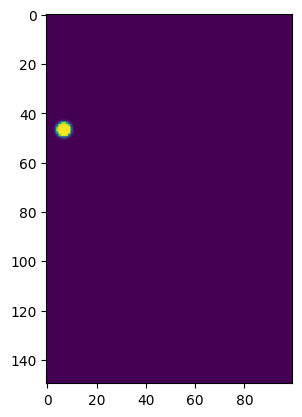

In [27]:
a[2]
plt.imshow(a[2][6, :, :])

In [3]:
displaceable_gist_map_array.shape

AttributeError: 'list' object has no attribute 'shape'

In [4]:
displaceable_gist_map_array[0].sum()

1331

In [4]:
from modules.get_labeled_water_coords import get_displaceable_water_coords
from lib.voxel import coordinate_to_voxel_index, read_xyzv

In [5]:
dis = get_displaceable_water_coords('4lkk', LIGAND_VOXEL_NUM, CLASSIFYING_RULE, LIGAND_POCKET_DEFINER)

In [6]:
dis.shape

(4, 3)

In [17]:
_,grid_dims,grid_origin = read_xyzv('4lkk')

/home/ito/research/src/preprocess/../lib/voxel.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path_to_xyzv, header=None, delim_whitespace=True)


In [8]:
grid_origin

array([-55.1403967, -36.2067844, -34.2513213])

In [18]:
grid_dims

array([150, 168, 294])

In [9]:
voxel = coordinate_to_voxel_index(dis[0], grid_origin)
voxel

array([57, 75, 94])

In [6]:
displaceable_gist_map_array[0].sum()

-37.541071318

In [14]:
x = 6
displaceable_gist_map_array[0][57-x:57+x, 75-x:75+x, 94-x:94+x].sum()

-37.541071318

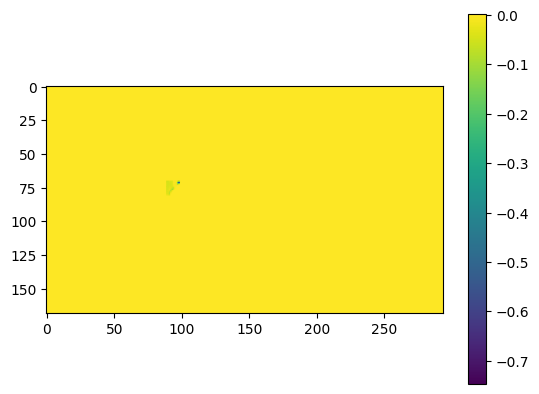

In [4]:
import matplotlib.pyplot as plt
plt.imshow(displaceable_gist_map_array[0][57,:,:])
plt.colorbar()


In [12]:
from modules.get_gist_map_info import get_gist_map_info
_, grid_dims, grid_origin = get_gist_map_info('4lkk')

In [46]:
grid_origin

array([-55.1403967, -36.2067844, -34.2513213])

In [54]:
grid_dims

array([150, 168, 294])

In [21]:
from WaterClassifier.LigandPocketDefinerGhecom import LigandPocketDefinerGhecom

In [23]:
a = LigandPocketDefinerGhecom('4lkk', grid_dims, grid_origin, 10)
b = a.define_ligand_pocket()

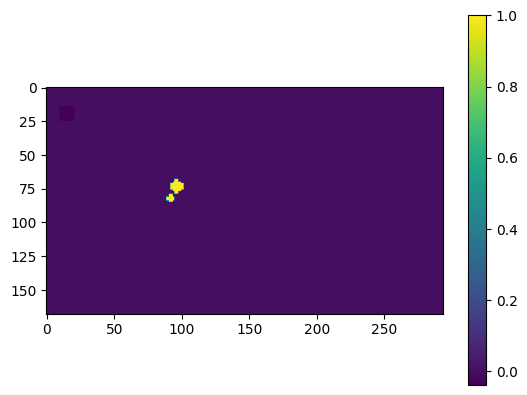

In [30]:
import matplotlib.pyplot as plt
plt.imshow((displaceable_gist_map_array[0] + b)[60, :, :])
plt.colorbar()